In [231]:
#Libraries
import requests as rq
import numpy as np
import pandas as pd
import math

In [232]:
#using hopkins available CSV to get data rather than having to webscrape ourselves
URL = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
covidData = pd.read_csv(URL)
#print(covidData)

In [233]:
#getting relevant data
covidData = covidData.drop(['Lat','Long'], axis=1)
#covidData = covidData.drop('Province/State', axis=1)
print(covidData)

    Province/State         Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  \
0              NaN            Afghanistan        0        0        0        0   
1              NaN                Albania        0        0        0        0   
2              NaN                Algeria        0        0        0        0   
3              NaN                Andorra        0        0        0        0   
4              NaN                 Angola        0        0        0        0   
..             ...                    ...      ...      ...      ...      ...   
261            NaN         Western Sahara        0        0        0        0   
262            NaN  Sao Tome and Principe        0        0        0        0   
263            NaN                  Yemen        0        0        0        0   
264            NaN                Comoros        0        0        0        0   
265            NaN             Tajikistan        0        0        0        0   

     1/26/20  1/27/20  1/28

In [234]:
covidData = covidData.set_index('Country/Region', drop = True)
print(covidData)

                      Province/State  1/22/20  1/23/20  1/24/20  1/25/20  \
Country/Region                                                             
Afghanistan                      NaN        0        0        0        0   
Albania                          NaN        0        0        0        0   
Algeria                          NaN        0        0        0        0   
Andorra                          NaN        0        0        0        0   
Angola                           NaN        0        0        0        0   
...                              ...      ...      ...      ...      ...   
Western Sahara                   NaN        0        0        0        0   
Sao Tome and Principe            NaN        0        0        0        0   
Yemen                            NaN        0        0        0        0   
Comoros                          NaN        0        0        0        0   
Tajikistan                       NaN        0        0        0        0   

           

In [235]:
#data was originally by province/region this next thing sums it up
covidData = covidData.groupby('Country/Region').sum()

print(covidData)

                    1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
Country/Region                                                             
Afghanistan               0        0        0        0        0        0   
Albania                   0        0        0        0        0        0   
Algeria                   0        0        0        0        0        0   
Andorra                   0        0        0        0        0        0   
Angola                    0        0        0        0        0        0   
...                     ...      ...      ...      ...      ...      ...   
West Bank and Gaza        0        0        0        0        0        0   
Western Sahara            0        0        0        0        0        0   
Yemen                     0        0        0        0        0        0   
Zambia                    0        0        0        0        0        0   
Zimbabwe                  0        0        0        0        0        0   

           

In [236]:
#omitting every country with less than 750 cases, as of May 3rd
droppedIndexes = covidData[covidData['5/3/20'] < 750].index
covidData.drop(droppedIndexes, inplace = True)

#manipulating data to make it easier to work with for later
covidData = covidData.T
covidData = covidData.reset_index()
covidData = covidData.drop('index', axis=1)

print(covidData)

#note first date was 1/22/20

Country/Region  Afghanistan  Albania  Algeria  Argentina  Armenia  Australia  \
0                         0        0        0          0        0          0   
1                         0        0        0          0        0          0   
2                         0        0        0          0        0          0   
3                         0        0        0          0        0          0   
4                         0        0        0          0        0          4   
..                      ...      ...      ...        ...      ...        ...   
98                     1939      766     3848       4285     1932       6752   
99                     2171      773     4006       4428     2066       6766   
100                    2335      782     4154       4532     2148       6778   
101                    2469      789     4295       4681     2273       6799   
102                    2704      795     4474       4783     2386       6822   

Country/Region  Austria  Azerbaijan  Ba

In [237]:
#libraries for graphs
import matplotlib.pyplot as plt
import matplotlib as mpl

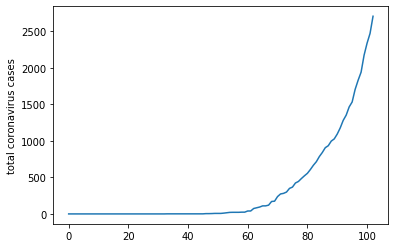

In [238]:
#graphing a curve to see if it's working, which it is
plt.plot(covidData['Afghanistan'])
plt.ylabel('total coronavirus cases')
plt.show()

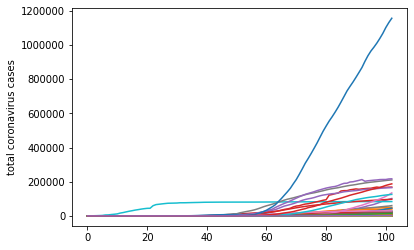

In [239]:
#graphing all curves just to see
plt.plot(covidData)
plt.ylabel('total coronavirus cases')
plt.show()

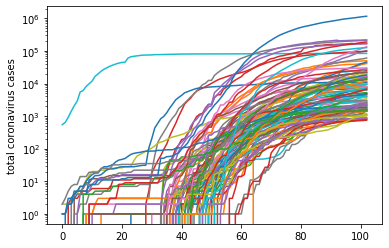

In [240]:
#graphing using log scale just to see
plt.plot(covidData)
plt.ylabel('total coronavirus cases')
plt.yscale('log')
plt.show()

In [241]:
#using logistic regression on data to determine time constant

from scipy.optimize import curve_fit

def logst(x, curveMax, rate, daysOffset):
    return curveMax / (1 + np.exp(-rate * (x - daysOffset)))

#note: probably not going to include china bc seems like they stopped testing

In [243]:
#reading csv of global population densities
popDensities = pd.read_csv('countryPopDensities.csv', encoding = 'cp1252')

#the csv contains data from 1960 to 2018, we're only concerned with the 2018 data
recentPopDensities = popDensities[['Country Name', '2018']]

print(recentPopDensities)

     Country Name        2018
0           Aruba  588.027778
1     Afghanistan   56.937760
2          Angola   24.713052
3         Albania  104.612263
4         Andorra  163.842553
..            ...         ...
259        Kosovo         NaN
260   Yemen, Rep.   53.977853
261  South Africa   47.630120
262        Zambia   23.341479
263      Zimbabwe   37.324591

[264 rows x 2 columns]


C:\Users\tangj\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in less
C:\Users\tangj\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in less


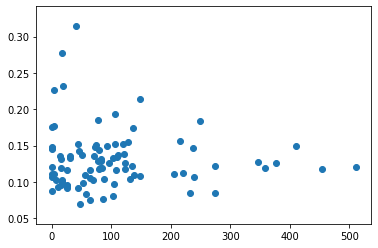

In [252]:
#match up population density data with the COVID-19 data
y = np.zeros(len(covidData.columns), dtype = float)
i = 0

for country in covidData.columns:
    try:
        popt, pcov = curve_fit(logst, covidData.index, covidData[country], p0 = [250000, 0.2, 25], bounds = ((0, 0, 0), (np.inf, 3, np.inf)))
        y[i] = popt[1]
        i += 1
    except:
        y[i] = -1
        i += 1


x = np.zeros(len(covidData.columns), dtype = float)

#matching population data with corresponding COVID-19 data indexes
for index, row in recentPopDensities.iterrows():
    j = 0
    for name in covidData.columns:
        if row['Country Name'] == name:
            x[j] = row['2018']
        j += 1

#removing the problematic elements of the list
x = x[y != -1]
y = y[y != -1]

y = y[x < 1000]
x = x[x < 1000]

plt.scatter(x, y)
plt.show()


In [253]:
#linear regression on densities plotted against growth
import sklearn.linear_model as skmodel

x = x.reshape(-1, 1)

model = skmodel.LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [254]:
r_sq = model.score(x, y)
print('R-value', math.sqrt(r_sq))
print('R-squared value', r_sq)

R-value 0.058893271636042854
R-squared value 0.0034684174439967297
